

# Project: Investigate a Dataset - Tmdb Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
For the dataset that would like to be analyzed is about TMDb movie data. There are some columns which is available to be explored for instance, id,imdb id, popularity of the movie, budget,revenue,movie title, cast of movie,homepage/website of the movie, director of the movie,tagline,keywords,overview,runtime/duration of the movie,genre of the movie, company who produced the movie,release date, voting information, release year, and also budget and revenue based on 2010 inflation. Each row as well as its column describes detail information about the movie which has been released. We could know some information like the most popular movie, the most profit movie, and so many more.


### Question(s) for Analysis

1. What is the most common runtime/duration of movie in this TMDb dataset?
2. Is the more popular movie related with the higher budget?
3. Does recent year of movie released make the movie has higher revenue?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [3]:
#Open the database to load the data set table information
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Check whether there is any null in the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
#Check statistic information within the dataset.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning

 

After checking above dataset, We need to do the cleaning, since it is found some messiness around the data such as Nan Value, unnecessary column information, and so many on. The cleaning process will be done one by one as following cell:


### Drop unrequired column for further analysis

In [6]:
df.drop(columns=['imdb_id','homepage','tagline','keywords','overview','production_companies','release_date'],axis=1,inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


### Drop the Nan value, therefore Nan doesn't exist in the dataset

In [8]:
df.dropna(subset=['cast','director','genres'],inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
id                10732 non-null int64
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [10]:
df.sample(10)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
8852,17908,0.378034,7000000,0,My Dog Skip,Frankie Muniz|Diane Lane|Kevin Bacon|Luke Wils...,Jay Russell,95,Comedy|Drama|Family,30,6.1,2000,8.864045e+06,0.000000e+00
2096,44835,0.564203,7000000,382946,Hesher,Joseph Gordon-Levitt|Natalie Portman|Rainn Wil...,Spencer Susser,106,Drama,104,6.2,2010,7.000000e+06,3.829460e+05
3099,15262,0.400724,0,0,Boogeyman 3,Erin Cahill|Chuck Hittinger|Mimi Michaels|Matt...,Gary Jones,94,Horror,28,4.4,2008,0.000000e+00,0.000000e+00
6472,10846,0.188680,35000000,0,La tigre e la neve,Roberto Benigni|Nicoletta Braschi|Tom Waits|Em...,Roberto Benigni,114,Comedy|Drama|Romance,47,6.2,2005,3.907972e+07,0.000000e+00
4487,102780,0.743538,0,89237,Byzantium,Saoirse Ronan|Gemma Arterton|Sam Riley|Caleb L...,Neil Jordan,118,Drama|Fantasy|Thriller,171,5.7,2012,0.000000e+00,8.475233e+04
1928,20526,2.911727,170000000,400062763,TRON: Legacy,Garrett Hedlund|Jeff Bridges|Olivia Wilde|Bruc...,Joseph Kosinski,125,Adventure|Action|Science Fiction,2026,6.3,2010,1.700000e+08,4.000628e+08
4820,118737,0.359022,0,0,Interview with a Hitman,Luke Goss|Caroline Tillette|Stephen Marcus|Dan...,Perry Bhandal,95,Action|Thriller,35,4.7,2012,0.000000e+00,0.000000e+00
10170,18973,0.055821,3000000,7100000,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,91,Comedy|Romance,13,7.2,1960,2.211890e+07,5.234807e+07
5064,8046,0.470814,54000000,7266209,Gigli,Ben Affleck|Jennifer Lopez|Justin Bartha|Laini...,Martin Brest,121,Drama,48,3.8,2003,6.400904e+07,8.613020e+06
5222,42418,0.040005,0,0,The Young Black Stallion,Biana Tamimi|Patrick Elias|GÃ©rard Rudolf|Ali ...,Simon Wincer,49,Action|Adventure|Drama|Family,11,4.8,2003,0.000000e+00,0.000000e+00


### Make the column content of original_title and director have the lower case on its initial letter, therefore it could be easier when we would analyze this data series

In [11]:
df['original_title']=df['original_title'].str.lower()
df['director']=df['director'].str.lower()

In [12]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,jurassic world,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,colin trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,mad max: fury road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,george miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,robert schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,star wars: the force awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,j.j. abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,james wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### What is the most common duration/runtime of movie in TMDb dataset?

(0, 300)

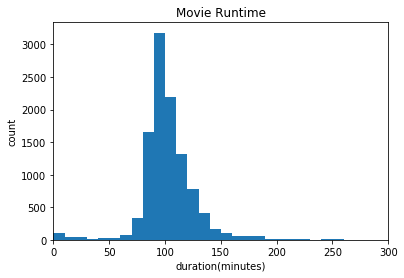

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
bins=np.arange(0,900+10,10)

plt.hist(data=df,x='runtime',bins=bins)
def xytitle(xL,yL,titleL):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.title(titleL)
    
xytitle('duration(minutes)','count','Movie Runtime')
plt.xlim(0,300)

Based on above histogram, we could see clearly that the histogram is right skewed and commonly the duration or runtime of the movie is around 100 minutes.

### Is the more popular movie related with higher budget?

(0, 15)

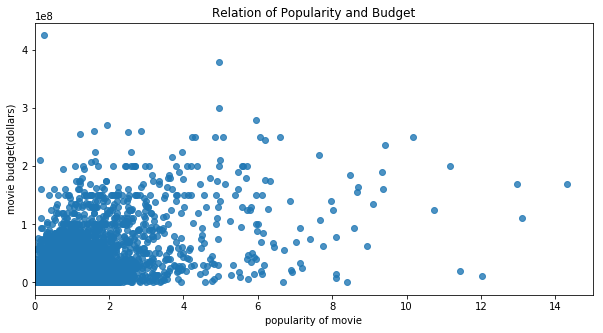

In [14]:
plt.figure(figsize=[10,5])
sb.regplot(data=df,x='popularity',y='budget',fit_reg=False)
xytitle('popularity of movie','movie budget(dollars)','Relation of Popularity and Budget')
plt.xlim(0,15)


Based on above scatter plot, it is hard to judge that the more movie become the popular one, the budget also will go up. Since we could see that there is highest budget movie with 400 millions US dollar, yet the popularity only below 1. But from the spread of the data there is a slight positive trend that the higher budget movie, the more popularity of movie become.

### Does recent year of movie released make the movie has higher revenue?

Text(0.5,1,'Revenue of Movie Categorized by Year')

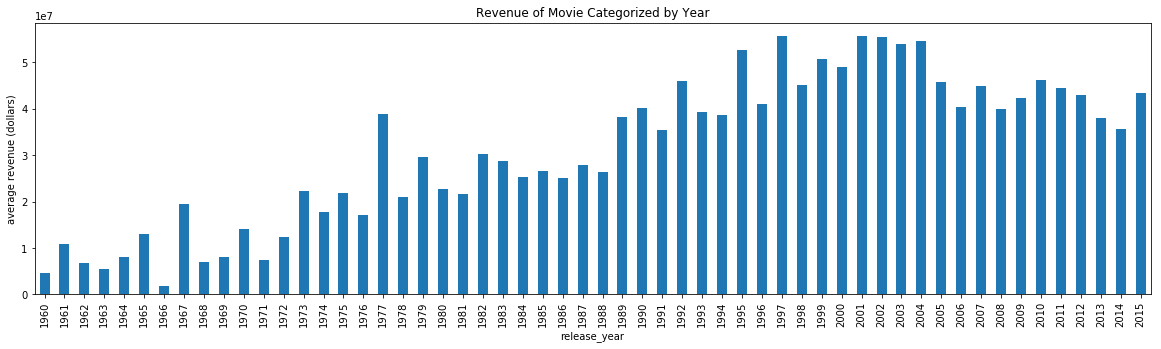

In [15]:
plt.figure(figsize=[20,5])
df.groupby('release_year').revenue.mean().plot(kind='bar')
plt.ylabel('average revenue (dollars)')
plt.title('Revenue of Movie Categorized by Year')

Based on above figure, we could clearly see that from year by year there is positive trend that the revenue goes up, eventhough after the year of 2004, the revenue slightly goes down.

<a id='conclusions'></a>
## Conclusions

Based on the observation and exploratory process, we can conclude that most likely movies in this TMDb dataset has the common duration around 100 minutes. There are some movies which has higher/lower duration, yet the most common one is this one. Next we jump out to the relation between popular movie and movie budget. There is slight relation between two of them, by checking the scatter plot, there is slight positive trend in the case of more popular movie means higher movie budget. And the last one regarding recent year of released movie. Does it mean with the recent year release, the movie will have higher revenue? Yes, indeed. The revenue has positive trend and goes up year by year, yet after 2004, there is a slight decrease.

One of the limitation that occurr during analyzing this dataset is the data not fully updated, we take as example in release year of movie. If we would like to know and compare the current revenue of movie, the movie title should be added up until current year. Another limitation is found also missing value data, the content of each column which doesn't have correct name(like in original title/director column). If this two is being fixed, we could analyze the data in better way.


## Submitting your Project 


In [16]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0